<a href="https://colab.research.google.com/github/Arghyadeep-Flash/Amazon-Fine-Food-Sentiment-Analysis/blob/main/Amazon_Fine_Food_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Fine Food Review Sentiment Analysis**

**Sentiment Analysis is the process of "computationally" identifying and categorizing opinions expressed in a piece of text, especially whether the writer's attitude towards a particular topic,product etc.. is positive, negative or neutral.**

**Mount Google Drive with Colab**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Importing Necessary Modules**

In [ ]:
#Data Processing
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Text Processing
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import ast  #This module helps Python applications to process trees of the Python abstract syntax grammar.

#For Regular Expression
import re

#Text Visualization
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#Sentiment Analysis
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 14.9 MB/s 


**Data Collection**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


**Information about Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


**Three most relavant attributes here, are: 1. Score 2. Summary 3.Text**


**Text Processing**

**Text Processing is removing the stopwords, converting the text into lower case, removing punctuation and lemmating them. Lemmatizing means convert the word to it's root.** 

**For this text processing Textblob is used here, which is a library built upon NLTK and provides an easy to use interface to the NLTK library. Various tasks can be performed using this library such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation etc..**

In [ ]:
#Lower casing
df["Text"] = df["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df.Text

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price. there was a wide...
                                ...                        
568449    great for sesame chicken..this is a good if no...
568450    i'm disappointed with the flavor. the chocolat...
568451    these stars are small, so you can give 10-15 o...
568452    these are the best treats for training and rew...
568453    i am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [ ]:
#Remove Punctuation
df["Text"] = df["Text"].str.replace("[^\w\s]","")

In [ ]:
df.Text

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price there was a wide ...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give 1015 of ...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Text, Length: 568454, dtype: object

**Now it is essential to remove the stopwords which are not usefull at all.**

In [ ]:
#Download Stopwords
nltk.download('stopwords')

#Get the stopwords list
stopword = stopwords.words('english')

#Remove these from our dataset
df["Text"] = df["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.Text

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanutsth...
2         confection around centuries light pillowy citr...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate notes especia...
568451    stars small give 1015 one training session tri...
568452    best treats training rewarding dog good groomi...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 568454, dtype: object

[**Stemming and Lemmatization**](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

In [ ]:
#Download root word
nltk.download('wordnet')

df["Text"] = df["Text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanutsth...
2         confection around century light pillowy citrus...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate note especial...
568451    star small give 1015 one training session trie...
568452    best treat training rewarding dog good groomin...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 568454, dtype: object

**Exploratory Data Analysis**

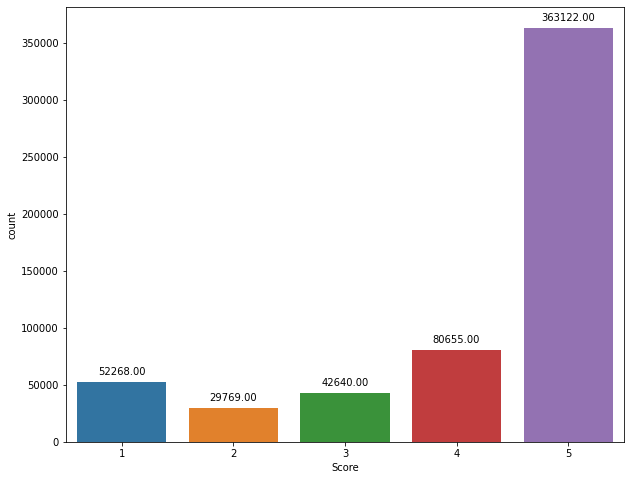

In [ ]:
#Score Attribute Value Counts
plt.figure(figsize = (10,8))
g = sns.countplot(x = "Score", data = df)
ax = g

#Annoted axix
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Here we can see most of the reviews are positive reviews**

In [ ]:
#To perform EDA it's good to create another dataframe
Amazon_Review = df

#Dropping the Null values from newly created Data Frame
Amazon_Review.dropna(inplace = True)

In [ ]:
#Separate the Data Frame according to the Score Attribute Value
Score_1 = Amazon_Review[Amazon_Review["Score"] == 1]
Score_2 = Amazon_Review[Amazon_Review["Score"] == 2]
Score_3 = Amazon_Review[Amazon_Review["Score"] == 3]
Score_4 = Amazon_Review[Amazon_Review["Score"] == 4]
Score_5 = Amazon_Review[Amazon_Review["Score"] == 5]

In [ ]:
#Concatenate the Score Values as a Attribute in a Separate Data Frame
Score_df = pd.concat([Score_1,Score_2,Score_3,Score_4,Score_5], axis =0)

#Flatter the Data Frame
Score_df.reset_index(drop = True, inplace = True)

In [ ]:
Score_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...
1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,cat happily eating felidae platinum two year g...
2,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,candy red flavor plan chewy would never buy
3,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,oatmeal good mushy soft dont like quaker oat w...
4,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,arrived 6 day stale could eat 6 bag
...,...,...,...,...,...,...,...,...,...,...
568406,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,complaint there much dont use huge amount 5 sp...
568407,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chickenthis good better resturant...
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,star small give 1015 one training session trie...
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treat training rewarding dog good groomin...


**Now it's time to show our summary text using Wordcloud.**

**A Wordcloud or Tagcloud is a visual representation of text data. It displays a list of words, the importance of each being shown with fontsize or colour. This format is useful for quickly perceiving the most prominent terms.**

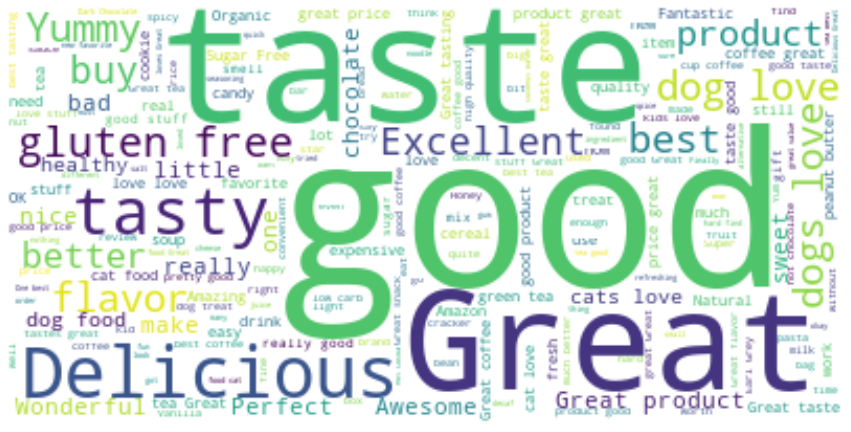

In [ ]:
#Wordclouds function's input needs to be a single string of text.
#Concatenating all summaries into a single string
Amazon_Review_str = Score_df.Summary.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(Amazon_Review_str)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Now Split the DataFrame into Positive and Negative Reviews**

In [ ]:
#Define Negative if Score is 1 or 2 and Positive if Score is 4 or 5
Negative_Review = Score_df[Score_df['Score'].isin([1,2])]
Positive_Review = Score_df[Score_df['Score'].isin([4,5])]

#Transfer into a Single String
Negative_Review_str = Negative_Review.Summary.str.cat()
Positive_Review_str = Positive_Review.Summary.str.cat()

**Create WordCloud for both Negative and Positive Reviews**

Text(0.5, 1.0, 'Review with Positive Score')

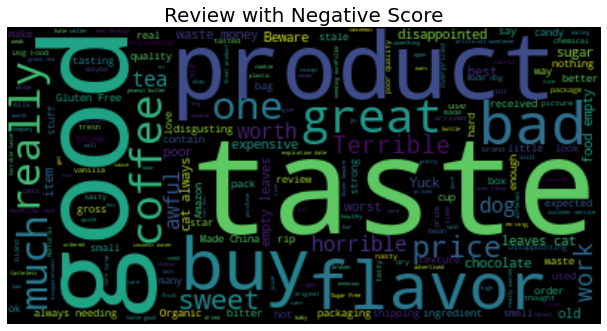

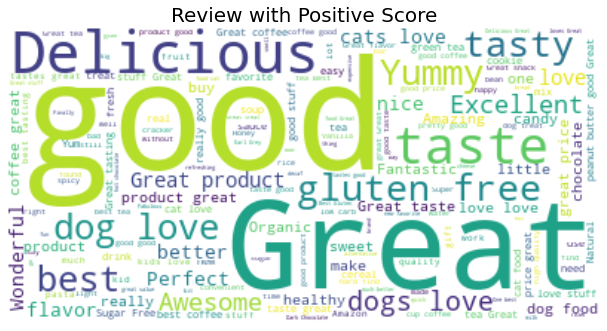

In [ ]:
#Create WordCloud Object
Negative_WordCloud = WordCloud(background_color = 'black').generate(Negative_Review_str)
Positive_WordCloud = WordCloud(background_color = 'white').generate(Positive_Review_str)

#Plotting The Negative WordCloud Object
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(211)
ax1.imshow(Negative_WordCloud,interpolation='bilinear')
ax1.axis('off')
ax1.set_title("Review with Negative Score", fontsize =20)

#Plotting The Positive WordCloud Object
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(212)
ax1.imshow(Positive_WordCloud,interpolation='bilinear')
ax1.axis('off')
ax1.set_title("Review with Positive Score", fontsize =20)

**Sentiment Score**

**Sentiment Analysis: In Sentiment Analysis a pretrained model takes the input from the text description and output the Sentiment Score ranging from -1 to +1 for each sentence.**

**VADER Sentiment: Valence Aware Dictionary and Sentiment Reasoner abbriviated as VADER is used here. It is a lexicon and rule-based Sentiment Analysis tool that is specifically attuned to sentiment expressed in Social Media. VADER uses a combination of a Sentiment Lexicon(list of Lexical Features eg: Words, which are generally labeled according to their Semantic Orientation as either Positive or Negative. VADER not only tells about the Positive and Negative Score but also tells us about how Positive or Negative a Sentiment is.**

In [ ]:
#Create an Object of the Sentiment Analyzer
S_Analyzer = SentimentIntensityAnalyzer()

#Generate Sentiment for all the sentence present in the Dataset
VS = list()

for row in df['Text']:
  temp_vs = S_Analyzer.polarity_scores(row)
  VS.append(temp_vs)

#Creating Data Frame with the Sentiment Score
Sentiment_df = pd.DataFrame(VS)
Sentiment_df

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468
...,...,...,...,...
568406,0.000,0.420,0.580,0.9300
568407,0.329,0.535,0.135,-0.7841
568408,0.000,0.749,0.251,0.8860
568409,0.059,0.243,0.697,0.9738


In [ ]:
#Merging The Sentiment Score with the Actual DataFrame
Review_Sentiment = pd.concat([df.reset_index(drop = True),Sentiment_df], axis = 1)
Review_Sentiment.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468


**From these value it is difficult to understand which one is Positive Sentiment, which one is Negative Sentiment or which one is Neutral. For this we have to do some certain steps.**

In [ ]:
#Convert the Scores into Positive and Negative Sentimens using Some Threshold
Review_Sentiment["Sentiment"] = np.where(Review_Sentiment['compound'] >=0,"Positive","Negative")
Review_Sentiment.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568406,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chickenthis good better resturant...,0.000,0.420,0.580,0.9300,Positive
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,im disappointed flavor chocolate note especial...,0.329,0.535,0.135,-0.7841,Negative
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,star small give 1015 one training session trie...,0.000,0.749,0.251,0.8860,Positive
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treat training rewarding dog good groomin...,0.059,0.243,0.697,0.9738,Positive


**Final Result of the Sentiment Analysis**

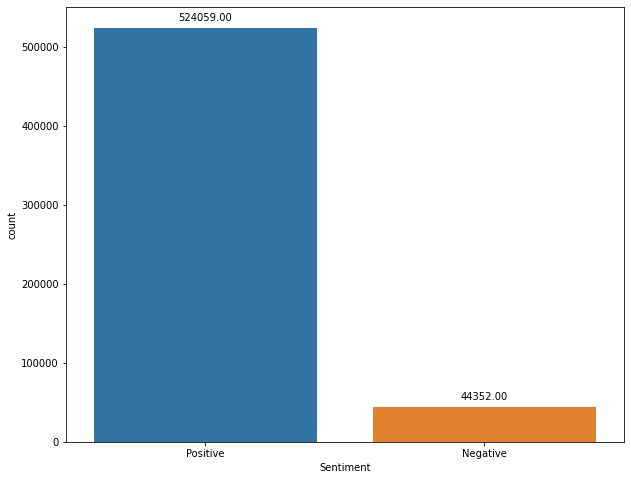

In [ ]:
#Plot the number of Positive and Negative Reviews
plt.figure(figsize = (10,8))
g = sns.countplot(x = "Sentiment", data = Review_Sentiment)
ax = g


#Annoted axix
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')